# Alpha-Beta Pruning

This allows us to search much faster and even go into deeper levels in the game tree. It cuts off branches in the game tree which need not be searched because there already exists a better move available. It is called Alpha-Beta pruning because it passes 2 extra parameters in the minimax function, namely alpha and beta.

 Alpha is the best value that the maximizer currently can guarantee at that level or above. Beta is the best value that the minimizer currently can guarantee at that level or below.

# 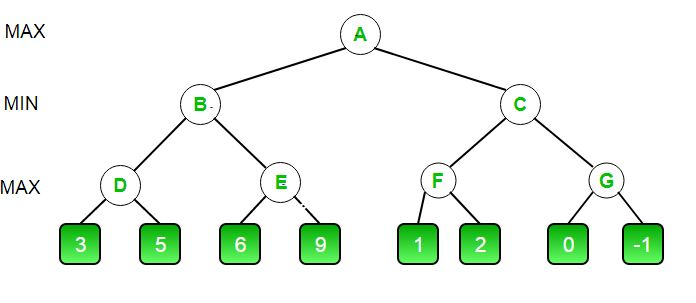

The initial call starts from A. The value of alpha here is -INFINITY and the value of beta is +INFINITY. These values are passed down to subsequent nodes in the tree. At A the maximizer must choose max of B and C, so A calls B first
 At B it the minimizer must choose min of D and E and hence calls D first.
 
 At D, it looks at its left child which is a leaf node. This node returns a value of 3. Now the value of alpha at D is max( -  INF, 3) which is 3.

To decide whether its worth looking at its right node or not, it checks the condition beta<=alpha. This is false since beta = +INF and alpha = 3. So it continues the search.

D now looks at its right child which returns a value of 5.At D, alpha = max(3, 5) which is 5. Now the value of node D is 5

D returns a value of 5 to B. At B, beta = min( +INF, 5) which is 5. The minimizer is now guaranteed a value of 5 or lesser. B now calls E to see if he can get a lower value than 5.

At E the values of alpha and beta is not -INF and +INF but instead -INF and 5 respectively, because the value of beta was changed at B and that is what B passed down to E

Now E looks at its left child which is 6. At E, alpha = max(-INF, 6) which is 6. Here the condition becomes true. beta is 5 and alpha is 6. So beta<=alpha is true. Hence it breaks and E returns 6 to B

Note how it did not matter what the value of E‘s right child is. It could have been +INF or -INF, it still wouldn’t matter, We never even had to look at it because the minimizer was guaranteed a value of 5 or lesser. So as soon as the maximizer saw the 6 

he knew the minimizer would never come this way because he can get a 5 on the left side of B. This way we didn’t have to look at that 9 and hence saved computation time.

E returns a value of 6 to B. At B, beta = min( 5, 6) which is 5.The value of node B is also 5

# 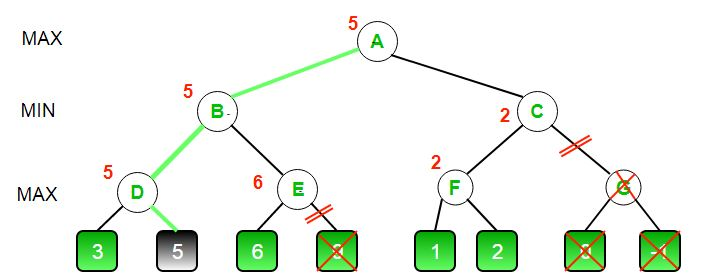

In [1]:

MAX, MIN = 1000, -1000


def minimax(depth, nodeIndex, maximizingPlayer,
			values, alpha, beta):


	if depth == 3:
		return values[nodeIndex]

	if maximizingPlayer:
	
		best = MIN


		for i in range(0, 2):
			
			val = minimax(depth + 1, nodeIndex * 2 + i,
						False, values, alpha, beta)
			best = max(best, val)
			alpha = max(alpha, best)


			if beta <= alpha:
				break
		
		return best
	
	else:
		best = MAX


		for i in range(0, 2):
		
			val = minimax(depth + 1, nodeIndex * 2 + i,
							True, values, alpha, beta)
			best = min(best, val)
			beta = min(beta, best)


			if beta <= alpha:
				break
		
		return best

if __name__ == "__main__":

	values = [4, 10, 11, 19, 13, 22, 50, -1]
	print("The optimal value is :", minimax(0, 0, True, values, MIN, MAX))
	



The optimal value is : 22
